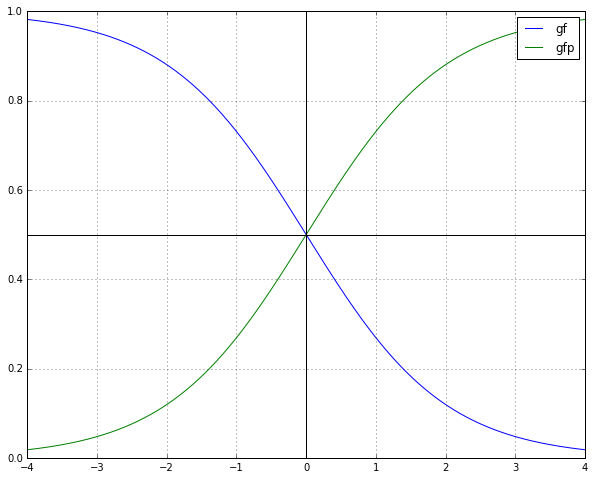

In [103]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
pylab.rcParams['figure.figsize']= (10.0,8.0)
def f(x):
    return  1/(1+np.exp(x))
def gp(x):
    return 4 - (7*np.exp(x))/(1+np.exp(x))

x_axis=np.linspace(-4, 4, 100000)
ax = plt.subplot()
ax.plot(x_axis, f(x_axis), label='gf')
ax.plot(x_axis,1-f(x_axis), label = 'gfp')
ax.grid(True, which='both')
ax.axhline(y=.5, color='k')
ax.axvline(x=0, color='k')
ax.legend()

In [104]:
def cll(WO ,y):
    s = 0
    for y1 in y:
        if y1:
            s +=np.log(1-f(WO))
        else:
            s +=np.log(f(WO))
    return s

In [105]:
def gcll(WO, y):
    g =0
    for y1 in y:
        if y1:
            g +=f(WO)
        else:
            g -=(1-f(WO))
    return g
y=np.array([False, True, True, False])


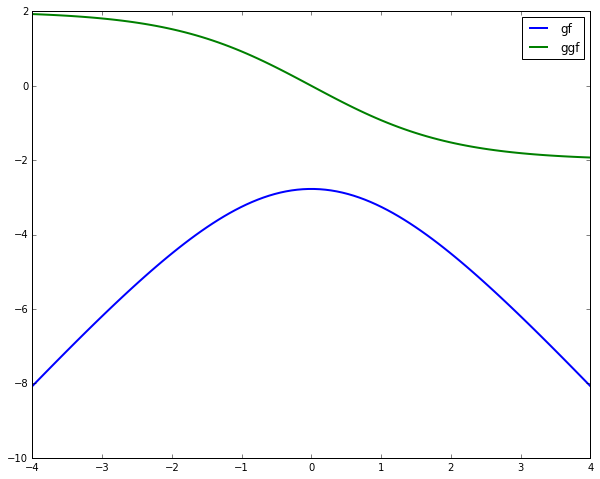

In [106]:
xs=np.linspace(-4, 4, 100)
ax = plt.subplot()
ax.plot(xs, [cll(x,y)for x in xs], linewidth=2  , label='gf')
ax.plot(xs, [gcll(x,y)for x in xs], linewidth=2  , label='ggf')
#ax.plot(x_axis,1-f(x_axis), label = 'gfp')
#ax.grid(True, which='both')
#ax.axhline(y=.5, color='k')
#ax.axvline(x=0, color='k')
ax.legend()

In [107]:
from scipy.optimize import minimize
fun=lambda x: -cll(x,y)
x0=0
res = minimize(lambda x:-cll(x,y), 1, method='BFGS', jac=lambda x:-gcll(x,y))
res

      fun: 2.772588722244074
 hess_inv: array([[ 1.00043963]])
      jac: array([  2.93016714e-06])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([  2.93016715e-06])

In [108]:
f(res.x[0])

0.49999926745821377